In [18]:
POSTGIS = get_dbconn("postgis")
pcursor = POSTGIS.cursor()

events = []
pcursor.execute("""SELECT issue, expire, phenomena, significance from warnings
 WHERE ugc = (select ugc from ugcs where name = 'Story' and state = 'IA' 
 and substr(ugc,3,1) = 'Z' and end_ts is null)
 and issue > '2014-12-01' and significance != 'A' ORDER by issue ASC""")
for row in pcursor:
    print(f"{row[0]} {row[1]} {row[2]} {row[3]}")
    events.append(row)

IEM = get_dbconn("asos")
icursor = IEM.cursor()

icursor.execute("""SELECT valid, wcht(tmpf, sknt), sknt from alldata where station = 'AMW'
 and sknt >= 0 and valid > '2014-12-01' ORDER by valid ASC""")
valid = []
wcht = []
for row in icursor:
    wcht.append(row[1])
    valid.append(row[0])

2014-12-05 04:29:00-06:00 2014-12-05 10:00:00-06:00 FG Y
2014-12-14 08:29:00-06:00 2014-12-14 11:45:00-06:00 FG Y
2014-12-15 20:00:00-06:00 2014-12-16 06:00:00-06:00 WI Y
2014-12-21 00:24:00-06:00 2014-12-21 05:07:00-06:00 FG Y
2014-12-30 18:00:00-06:00 2014-12-31 09:59:00-06:00 WC Y
2015-01-03 18:00:00-06:00 2015-01-04 06:00:00-06:00 WW Y
2015-01-04 06:07:00-06:00 2015-01-05 09:00:00-06:00 WC Y
2015-01-05 14:00:00-06:00 2015-01-05 23:00:00-06:00 WS W
2015-01-06 04:15:00-06:00 2015-01-06 12:00:00-06:00 WC Y
2015-01-07 00:00:00-06:00 2015-01-07 12:00:00-06:00 WC W
2015-01-07 04:18:00-06:00 2015-01-08 09:00:00-06:00 WC Y
2015-01-08 14:05:00-06:00 2015-01-09 05:38:00-06:00 WW Y
2015-01-09 05:38:00-06:00 2015-01-09 09:20:00-06:00 WC Y
2015-01-09 18:00:00-06:00 2015-01-10 09:00:00-06:00 WC Y
2015-01-31 19:00:00-06:00 2015-02-01 21:00:00-06:00 WS W
2015-02-02 03:00:00-06:00 2015-02-02 09:00:00-06:00 WC Y
2015-02-18 03:00:00-06:00 2015-02-18 12:00:00-06:00 WC Y


NameError: name 'valid' is not defined

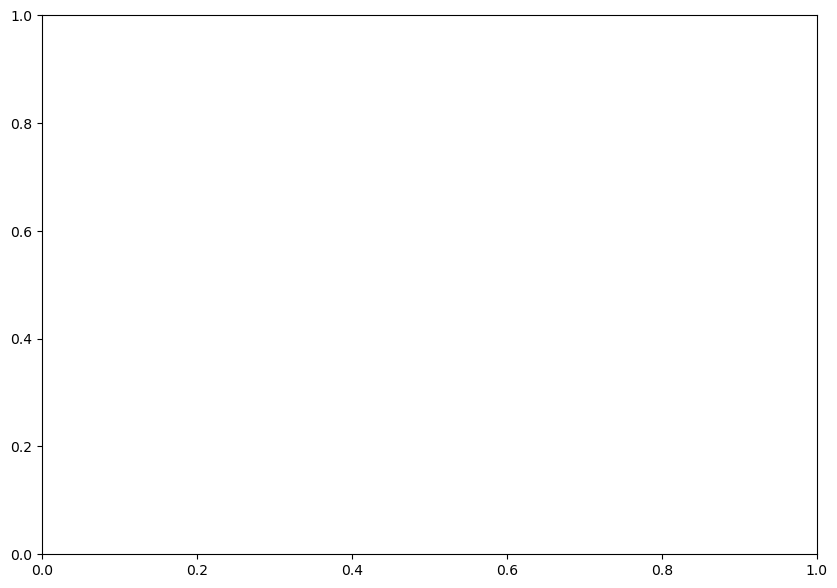

In [1]:
import datetime

import pytz

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

(fig, ax) = plt.subplots(1, 1, figsize=(10, 7))

colors = {"W": "#ff0000", "Y": "#00ff00"}

ax.plot(valid, wcht, zorder=2, lw=2)
ymin, ymax = ax.get_ylim()
for event in events:
    delta = (event[1] - event[0]).days * 86400.0 + (
        event[1] - event[0]
    ).seconds
    if event[2] == "WC":
        color = colors[event[3]]
    else:
        continue
        # color = 'tan'
    rect = Rectangle(
        (event[0], ymin),
        delta / 86400.0,
        ymax - ymin,
        alpha=0.5,
        facecolor=color,
        edgecolor="none",
        zorder=1,
    )
    ax.add_patch(rect)

ax.set_xlim(datetime.datetime(2014, 12, 29), events[-1][1])
ax.xaxis.set_major_locator(
    mdates.DayLocator(interval=7, tz=pytz.timezone("America/Chicago"))
)

ax.xaxis.set_major_formatter(
    mdates.DateFormatter("%-d\n%b", tz=pytz.timezone("America/Chicago"))
)
ax.grid(True)
ax.set_yticks(range(-40, 61, 10))
ax.set_ylabel("Wind Chill Temperature $^\circ$F", fontsize=16)
ax.set_title(
    "29 Dec 2014 - 17 Feb 2015 Ames Wind Chill\nNWS Issued Wind Chill Advisories(green) + Warnings(red)",
    fontsize=16,
)
fig.savefig("150218.png")